# Dataset Description

The CIFAR-10 dataset is a widely-used collection of images for machine learning and computer vision research. Here is a detailed description of the dataset:

**Dataset Size:** It consists of a total of 60,000 color images.

**Image Dimensions:** Each image is 32x32 pixels in size.

**Classes:** The images are divided into 10 distinct classes. Each class contains 6,000 images.


**Class Labels:** The 10 classes are:

airplane

*  horse
*  frog

*   deer
*    cat
*  dog
*   bird
*   automobile


*   ship
*     truck





**Splits:** The dataset is typically split into two subsets:

**Training Set:** 50,000 images used for training machine learning models.

**Test Set:** 10,000 images used for evaluating the performance of trained models.

The CIFAR-10 dataset is a popular benchmark for evaluating the performance of image classification models, especially Convolutional Neural Networks (CNNs).












In [77]:
import tensorflow as tf
from tensorflow.keras import datasets , layers , models
import matplotlib.pyplot as plt
import numpy as np

In [78]:
(X_train , y_train) , (X_test , y_test) = datasets.cifar10.load_data()
X_train.shape

(50000, 32, 32, 3)

In [79]:
X_test.shape

(10000, 32, 32, 3)

In [80]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [81]:
y_train = y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [82]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [83]:
def plot_sample(X,y, index):
    plt.figure(figsize = (15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])


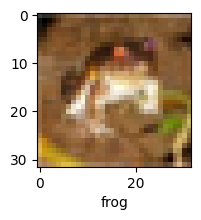

In [84]:
plot_sample(X_train , y_train , 0)

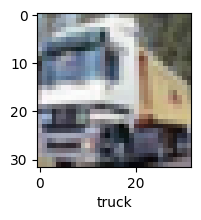

In [85]:
plot_sample(X_train , y_train , 1)

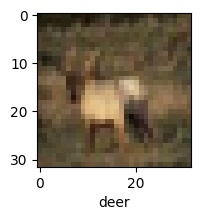

In [86]:
plot_sample(X_train , y_train , 3)

In [87]:
X_train = X_train/255
X_test = X_test/255

In [88]:
cnn = models.Sequential([
          # CNN
          layers.Conv2D(filters = 32 , kernel_size = (3,3) , activation = 'relu' , input_shape = (32,32,3)),
          layers.MaxPooling2D((2,2)),

          layers.Conv2D(filters = 64 , kernel_size = (3,3) , activation = 'relu'),
          layers.MaxPooling2D((2,2)),

          # dense
          layers.Flatten(),
          layers.Dense(64, activation = 'relu' ),
          layers.Dense(10, activation = 'softmax')  # Normalize your probabilities
          ])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [89]:
cnn.compile(optimizer = 'adam',
               loss = 'sparse_categorical_crossentropy',
            metrics = ['accuracy'])

In [90]:
cnn.fit(X_train , y_train , epochs = 20)

Epoch 1/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.3732 - loss: 1.7185
Epoch 2/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.5836 - loss: 1.1809
Epoch 3/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.6467 - loss: 1.0157
Epoch 4/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.6829 - loss: 0.9130
Epoch 5/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7069 - loss: 0.8509
Epoch 6/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.7254 - loss: 0.7939
Epoch 7/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7437 - loss: 0.7453
Epoch 8/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7573 - loss: 0.7034
Epoch 9/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.7687 - loss: 0.6644
Epoch 10/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.7783 - loss: 0.6415
Epoch 11/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7927 - loss: 0.5968
Epoch 12/20
1563/1563 ━━━━━━━

In [91]:
cnn.evaluate(X_test , y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.6935 - loss: 1.0827


[1.1101926565170288, 0.6891000270843506]

In [92]:
y_test - y_test.reshape(-1,)
y_test[:5]

array([[3],
       [8],
       [8],
       [0],
       [6]], dtype=uint8)

TypeError: only integer scalar arrays can be converted to a scalar index

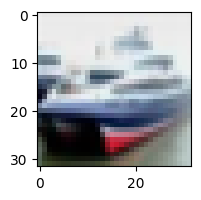

In [94]:
plot_sample(X_test, y_test , 1)

In [96]:
y_pred = cnn.predict(X_test)
y_pred[:5]

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


array([[2.0846923e-05, 9.3597613e-05, 3.5817586e-03, 2.6778668e-01,
        2.2033222e-02, 1.4750729e-02, 6.9105452e-01, 3.3730801e-05,
        4.3787109e-04, 2.0711566e-04],
       [1.2433159e-04, 7.0681036e-03, 2.1406767e-09, 1.6546137e-08,
        1.2122706e-10, 6.9765876e-10, 1.5339261e-08, 1.3140769e-13,
        9.9277556e-01, 3.1928073e-05],
       [1.3827887e-02, 4.9059045e-01, 1.1355159e-05, 8.9506211e-04,
        1.9811599e-04, 2.8118270e-04, 8.2989578e-04, 1.9224331e-05,
        4.6270064e-01, 3.0646205e-02],
       [8.6621886e-01, 1.3063912e-01, 8.3771529e-06, 1.5169347e-04,
        1.1044389e-06, 5.0399642e-08, 1.6015645e-05, 1.3957182e-06,
        2.7340523e-03, 2.2933664e-04],
       [1.4058003e-08, 1.9391166e-06, 6.8315124e-04, 6.2470575e-04,
        5.2235389e-01, 8.0610305e-05, 4.7625521e-01, 4.5870570e-09,
        4.1970546e-07, 2.8694027e-08]], dtype=float32)

In [97]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]

[np.int64(6), np.int64(8), np.int64(1), np.int64(0), np.int64(4)]

In [98]:
y_test[:5]

array([[3],
       [8],
       [8],
       [0],
       [6]], dtype=uint8)

TypeError: only integer scalar arrays can be converted to a scalar index

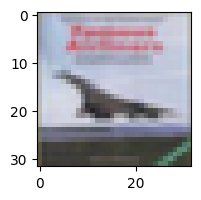

In [100]:
plot_sample(X_test , y_test , 3)

In [99]:
classes[y_classes[3]]  # Cnn making mistake is ok here

'airplane'

In [104]:
from sklearn.metrics import confusion_matrix , classification_report
print ("classification Report: \n", classification_report(y_test , y_classes))

classification Report: 
               precision    recall  f1-score   support

           0       0.79      0.67      0.72      1000
           1       0.76      0.85      0.80      1000
           2       0.62      0.54      0.58      1000
           3       0.48      0.47      0.48      1000
           4       0.60      0.67      0.63      1000
           5       0.60      0.60      0.60      1000
           6       0.76      0.78      0.77      1000
           7       0.72      0.76      0.74      1000
           8       0.81      0.79      0.80      1000
           9       0.76      0.78      0.77      1000

    accuracy                           0.69     10000
   macro avg       0.69      0.69      0.69     10000
weighted avg       0.69      0.69      0.69     10000



# Confusion matrix

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


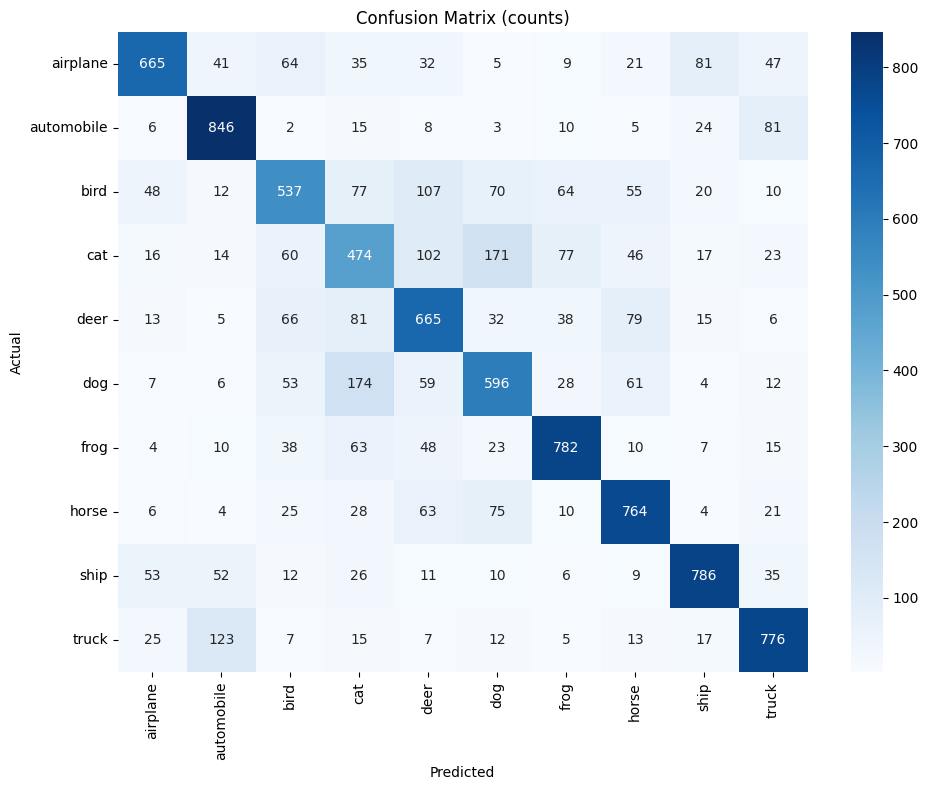

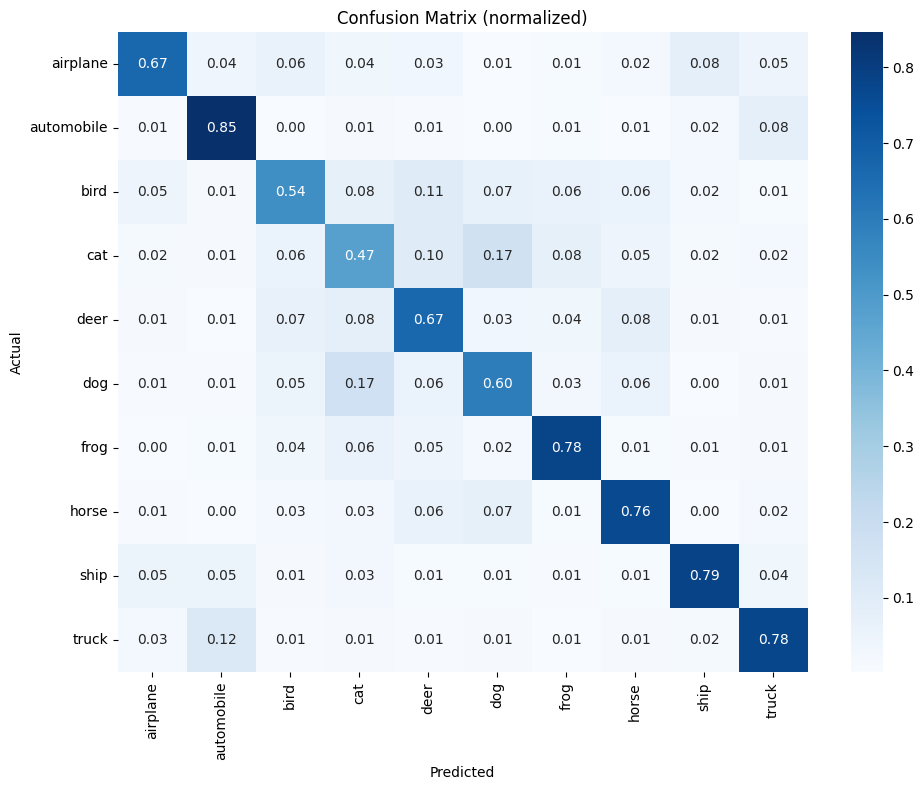

In [109]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


y_pred_probs = cnn.predict(X_test)
y_pred = np.argmax(y_pred_probs, axis=1)
y_true = y_test


cm = confusion_matrix(y_true, y_pred)
cm_norm = cm.astype('float') / cm.sum(axis=1, keepdims=True)

plt.figure(figsize=(10,8))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=classes, yticklabels=classes, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (counts)')
plt.tight_layout()
plt.show()

plt.figure(figsize=(10,8))
sns.heatmap(cm_norm, annot=True, fmt='.2f', xticklabels=classes, yticklabels=classes, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (normalized)')
plt.tight_layout()
plt.show()



 # Getting the first conv layer weights and normalizing filters for visualization

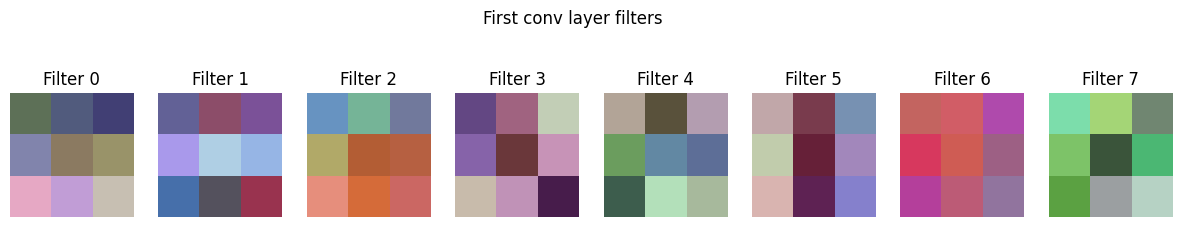

In [105]:

first_conv = cnn.get_layer(index=0)
weights, biases = first_conv.get_weights()


f_min, f_max = weights.min(), weights.max()
filters = (weights - f_min) / (f_max - f_min)

n_filters = filters.shape[-1]
fig, axes = plt.subplots(1, min(8, n_filters), figsize=(15,3))
for i in range(min(8, n_filters)):
    f = filters[:, :, :, i]

    axes[i].imshow(f)
    axes[i].axis('off')
    axes[i].set_title(f'Filter {i}')
plt.suptitle('First conv layer filters')
plt.show()



# Visualize the 32 feature maps and Creating a sub model that ouputs the activation

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_22']
Received: inputs=Tensor(shape=(1, 32, 32, 3))
  warnings.warn(msg)


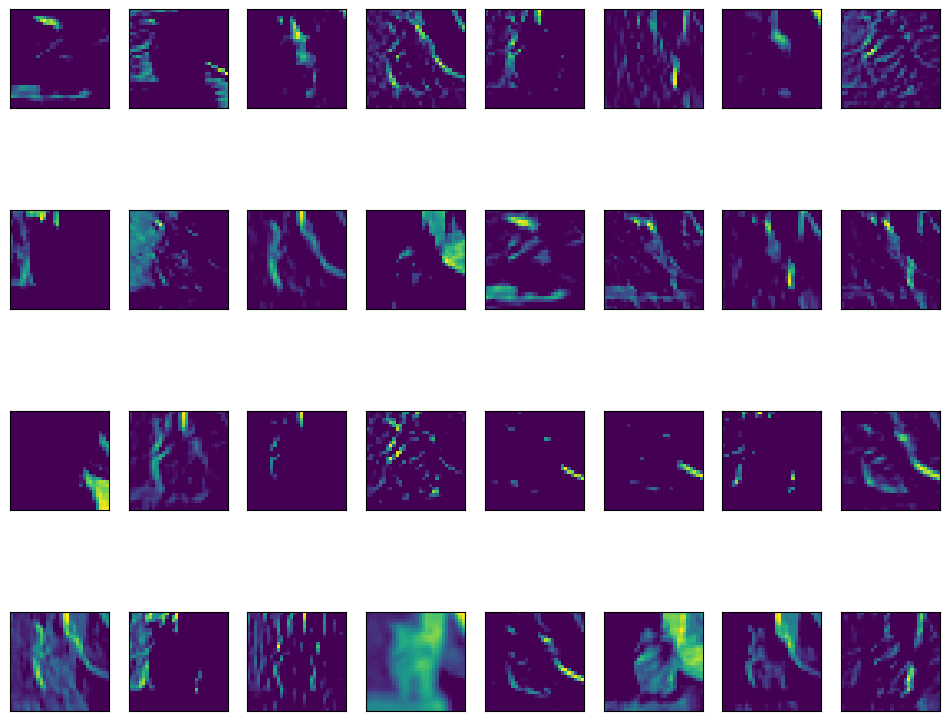

In [106]:

model2 = tf.keras.models.Model(inputs=cnn.inputs, outputs=cnn.layers[0].output)


image_for_analysis = np.expand_dims(X_test[46], axis=0)

feature_maps = model2.predict(image_for_analysis)

fig = plt.figure(figsize=(12, 10))
for i in range(1, 33):
    fig = plt.subplot(4, 8, i)
    fig.set_xticks([])
    fig.set_yticks([])
    plt.imshow(feature_maps[0, :, :, i-1])
plt.show()